## Libraries

In [286]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [287]:
import numpy as np
import pandas as pd

# We import the sk learn modules we'll need to segment our new data. We'll need scaler, pca and k-means.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# We import pickle in order to be able to load our pickled objects.
import pickle
# We import the Logistic Regression module from sk learn for the purchase probability model.
from sklearn.linear_model import LogisticRegression 
#We import the necessary libraries for visualization. We set seaborn do be our default.
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
# We import the Linear Regression module from sk learn for the quantity model.
from sklearn.linear_model import LinearRegression

In [288]:
path = '/content/drive/MyDrive/Portfolio/projects/Customer Analytics/'

In [289]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# **Purchase Data**

In [290]:
df_purchase = pd.read_csv(path + 'data/purchase data.csv')

In [291]:
# df_purchase.drop(columns=['ID'],inplace=True)

In [292]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0


In [293]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# Import Segmentation Model

In [294]:
# We load our pickled objects in order to segment the purchase data set.
scaler = pickle.load(open(path + 'models/scaler.pickle', 'rb'))

In [295]:
pca = pickle.load(open(path + 'models/pca.pickle', 'rb'))

In [296]:
kmeans_pca = pickle.load(open(path + 'models/kmeans_pca.pickle', 'rb'))

# Standardization

In [297]:
# We standardize the purchase data in the same way we did the segmentation data, using the standard scaler.
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

# PCA

In [298]:
# We apply pca on the purchase data and obtain 3 principal components for each row in the table. 
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

# K-means PCA

In [299]:
# Based on the principal components, we use the predict method from pca to segment the purchase data into the four segments.
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [300]:
# Copy resulting data frame as a purchase predictors data frame. 
# We'll be changing the predictors data frame, by adding and changing columns.
# Therefore, we want to keep an original copy.
df_purchase_predictors = df_purchase.copy()

In [301]:
# Add segment information as a new column in our predictors data frame.
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

In [302]:
df_segm_analysis = df_purchase_predictors.groupby(['Segment']).mean()
df_segm_analysis

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,,,,,,,,,,,,,,,,,,
0,2.000003e+08,349.762070,0.294998,1.149630,0.898913,1.144585,0.293693,1.392999,1.781336,2.006464,2.160836,2.654993,0.340670,0.321792,0.042018,0.118921,0.036451,0.480296,0.671596,54.937016,2.106916,160577.416181,1.185994,1.102479
1,2.000002e+08,350.825709,0.200224,0.470492,0.553853,0.466287,0.198355,1.391564,1.778943,2.007161,2.159742,2.655357,0.348395,0.318957,0.045465,0.118032,0.035279,0.270875,0.099108,35.989253,0.765759,96548.328910,0.277230,0.049297
2,2.000003e+08,349.078825,0.211263,0.561185,0.661128,0.558484,0.210035,1.392267,1.782738,2.007016,2.159721,2.655199,0.341982,0.307031,0.043464,0.116231,0.038225,0.891872,0.906114,29.507244,1.053532,108824.692723,0.685602,0.409020
3,2.000002e+08,347.269956,0.322607,1.429676,0.762224,1.427835,0.322018,1.391922,1.782389,2.006273,2.159714,2.653390,0.341016,0.312813,0.038660,0.118115,0.034168,0.032032,0.159205,37.904050,0.823049,140623.871355,1.288513,1.455965


In [303]:
# map({0: 'well-off',
#      1: 'fewer-opportunities',
#      2: 'standard',
#      3: 'career-focused'})

# 𝐃𝐞𝐬𝐜𝐫𝐢𝐩𝐭𝐢𝐯𝐞 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐛𝐲 𝐒𝐞𝐠𝐦𝐞𝐧𝐭𝐬

## 𝐃𝐚𝐭𝐚 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬 𝐛𝐲 𝐂𝐮𝐬𝐭𝐨𝐦𝐞𝐫

In [304]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1


In [305]:
# Purchase occasions by customer ID
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [306]:
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [307]:
# Average number of purchases by customer ID
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [308]:
# We obtain the segment for each customer in the data set.
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [309]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,1
200000002,87,11,0.126437,0
200000003,97,10,0.103093,1
200000004,85,11,0.129412,1
200000005,111,13,0.117117,3


# Segment Proportions

In [310]:
# We calculate the proportions of each segment and set the appropriate column name. 
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.196
1,0.376
2,0.208
3,0.220


Text(0.5, 1.0, 'Segment Proportions')

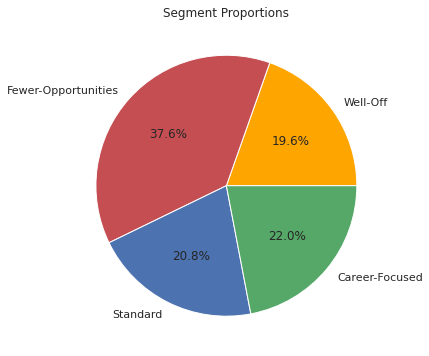

In [311]:

# We plot the segment proportions as a pie chart. 
# We can easily see which is the largest segment and the relative sizes of each segment.
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'],
        autopct = '%1.1f%%', 
        colors = ('orange', 'r', 'b', 'g'))
plt.title('Segment Proportions')

## 𝐏𝐮𝐫𝐜𝐡𝐚𝐬𝐞 𝐎𝐜𝐜𝐚𝐬𝐢𝐨𝐧 𝐚𝐧𝐝 𝐏𝐮𝐫𝐜𝐡𝐚𝐬𝐞 𝐈𝐧𝐜𝐢𝐝𝐞𝐧𝐜𝐞

In [312]:
# We calculate the mean by the four segments. It will help us determine the average customer behaivour in each segment.
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,117.295918,34.602041,0.284478
1,113.835106,22.792553,0.201755
2,117.471154,24.817308,0.212364
3,123.454545,39.827273,0.283102


In [313]:
# We calculate the standard deviation by segments. It will help us determine how homogoneus each of the segments is.
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

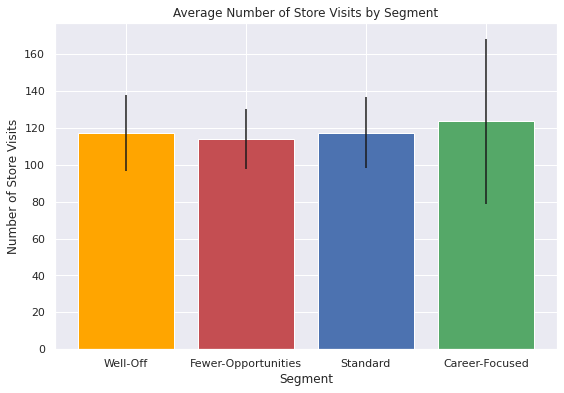

In [314]:
# We plot the average number of store visits for each of the four segments using a bar chart.
# We display the standard deviation as a straight line. The bigger the length, the higher the standard deviation is.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'), 
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('orange', 'r', 'b', 'g'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Number of Purchases by Segment')

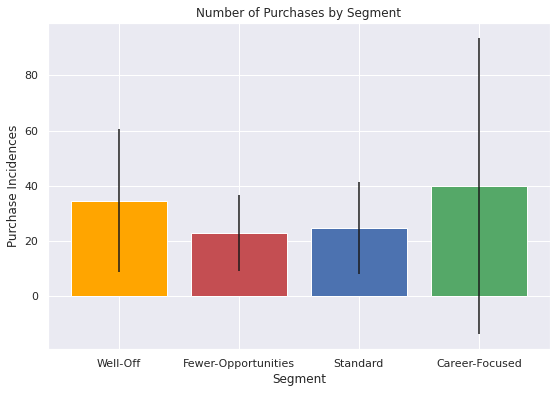

In [315]:
# We display the average number of purchases by segments. 
# They will help us understand how often each group buys chocholate candy bars.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'), 
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('orange', 'r', 'b', 'g'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')

Text(0.5, 1.0, 'Percentage of Time Purchase was Made on Visit by Segment')

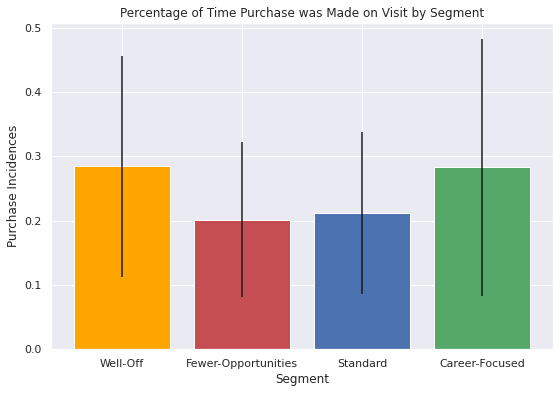

In [316]:
# We display the average number of purchases.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'),
        height = segments_mean['Average_N_Purchases'], 
        yerr = segments_std['Average_N_Purchases'], 
        color = ('orange', 'r', 'b', 'g'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Percentage of Time Purchase was Made on Visit by Segment')

## 𝐁𝐫𝐚𝐧𝐝 𝐂𝐡𝐨𝐢𝐜𝐞

In [317]:
# Select only rows where incidence is one. In other words, we are only interested in the times a purchase was made.
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [318]:
# Here we make dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,1,200000001
11,0,0,0,0,1,1,200000001
19,1,0,0,0,0,1,200000001
24,0,0,0,1,0,1,200000001
29,0,1,0,0,0,1,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,1,200000500
58648,1,0,0,0,0,1,200000500
58674,0,1,0,0,0,1,200000500
58687,0,1,0,0,0,1,200000500


In [319]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [320]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

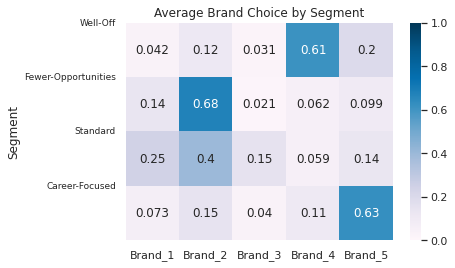

In [321]:
sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Well-Off', 'Fewer-Opportunities', 'Standard', 'Career-Focused'], rotation = 0, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

## Revenue

In [322]:
# Compute the revenue for brand 1.
# For each entry where Brand 1 was purchased, 
# we multiply the price of the brand for that particular day by the quantity of the product purchased.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Segment,Revenue Brand 1
0,0,699.47
1,1,2258.90
2,2,2611.19
3,3,736.09


In [323]:
# Compute revenue for brand 2. We use the same formula, but here we filter our data to contain only purchases of brand 2.
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [324]:
# Compute revenue for brand 3
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Revenue Brand 3','Segment']].groupby(['Segment'], as_index = False).sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [325]:
# Compute revenue for brand 4
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Revenue Brand 4','Segment']].groupby(['Segment'], as_index = False).sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [326]:
# Compute revenue for brand 5
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Revenue Brand 5','Segment']].groupby(['Segment'], as_index = False).sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [327]:
# We compute the total revenue for each of the segments. We simply sum the revenue for each of the five brands.
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                           segments_brand_revenue['Revenue Brand 2'] +
                                           segments_brand_revenue['Revenue Brand 3'] +
                                           segments_brand_revenue['Revenue Brand 4'] +
                                           segments_brand_revenue['Revenue Brand 5'] )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,699.47,1298.23,731.35,14185.57,5509.69,22424.31
1,1,2258.90,13868.30,716.25,1629.31,2230.50,20703.26
2,2,2611.19,4855.36,3909.17,861.38,2439.75,14676.85
3,3,736.09,1746.42,664.75,2363.84,19441.06,24952.16


In [328]:

# We further modify our table to include the segment proportions. 
# It is interesting to see the size of the segment compared to the revenue they bring.
# We also add the labels for the segments.s
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue = pd.merge(segments_brand_revenue, segments_mean, on='Segment')
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Well-Off',
                                                                           1:'Fewer-Opportunities',
                                                                           2:'Standard',
                                                                           3:'Career-Focused'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,,,,,,,,
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196,117.295918,34.602041,0.284478
Fewer-Opportunities,2258.90,13868.30,716.25,1629.31,2230.50,20703.26,0.376,113.835106,22.792553,0.201755
Standard,2611.19,4855.36,3909.17,861.38,2439.75,14676.85,0.208,117.471154,24.817308,0.212364
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220,123.454545,39.827273,0.283102


In [329]:
df_purchase_incidence.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand', 'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size', 'Segment'], dtype='object')

## Incidences
* Promotions can be 
    * price reduction:
        * Either price cut or a Buy 2 get 1
    * feature
        * Specific brand is being promoted with a coupon or something similar
    * display
        * Better product placement with no change in price

In [330]:
seg_inc = df_purchase_incidence[['ID', 'Segment','Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5']]

In [331]:
seg_no_promo = seg_inc.loc[(seg_inc['Promotion_1'] == 0)&(seg_inc['Promotion_2'] == 0)&(seg_inc['Promotion_3'] == 0)&(seg_inc['Promotion_4'] == 0)&(seg_inc['Promotion_5'] == 0)]
seg_no_promo

,ID,Segment,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5
6,200000001,1,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0
101,200000002,0,6,1,4,1,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0
138,200000002,0,283,1,4,3,0,0,1.37,1.89,2.00,2.14,2.64,0,0,0,0,0
161,200000002,0,471,1,4,3,4,1,1.39,1.36,2.02,2.21,2.70,0,0,0,0,0
164,200000002,0,508,1,4,1,2,1,1.34,1.88,2.07,2.26,2.49,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58568,200000499,1,727,1,2,5,0,0,1.50,1.82,2.09,2.24,2.80,0,0,0,0,0
58612,200000500,1,246,1,2,3,0,0,1.46,1.89,1.99,2.15,2.65,0,0,0,0,0
58621,200000500,1,296,1,2,6,0,0,1.48,1.89,2.01,2.18,2.69,0,0,0,0,0
58687,200000500,1,697,1,2,6,0,0,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0


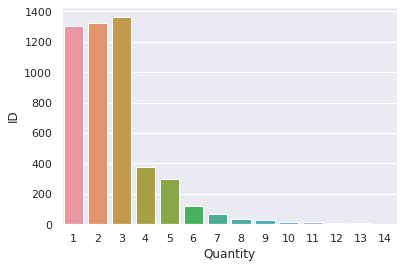

In [332]:
dff = seg_no_promo.groupby(['Quantity']).count().reset_index()
sns.barplot(data=dff, x='Quantity',y='ID')

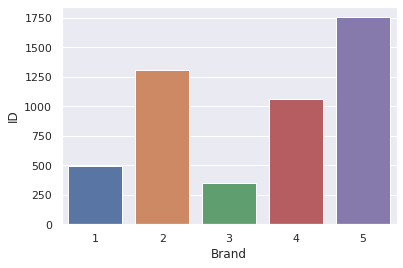

In [333]:
dff = seg_no_promo.groupby(['Brand']).count().reset_index()
sns.barplot(data=dff, x='Brand',y='ID')

In [334]:
bought_with_promo = seg_inc.loc[(seg_inc['Promotion_1'] == 1)|(seg_inc['Promotion_2'] == 1)|(seg_inc['Promotion_3'] == 1)|(seg_inc['Promotion_4'] == 1)|(seg_inc['Promotion_5'] == 1)]
bought_with_promo.loc[(bought_with_promo['Quantity'] == 13) & (bought_with_promo['Promotion_1'] == 1)]

,ID,Segment,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5
12900,200000112,0,547,1,5,13,0,0,1.35,1.89,2.07,2.26,2.63,1,0,0,0,0
13833,200000120,0,555,1,1,13,1,1,1.35,1.89,2.07,2.26,2.63,1,0,0,0,0
16993,200000147,2,345,1,2,13,0,0,1.35,1.89,1.97,2.02,2.61,1,0,0,0,0
36926,200000318,3,162,1,4,13,0,0,1.39,1.90,1.94,2.16,2.49,1,0,0,0,0
42601,200000366,0,305,1,5,13,0,0,1.36,1.89,1.97,2.03,2.68,1,0,0,1,0
48265,200000414,3,547,1,5,13,0,0,1.35,1.89,2.07,2.26,2.63,1,0,0,0,0


In [335]:
promos = bought_with_promo[['Promotion_1','Promotion_2','Promotion_3','Promotion_4','Promotion_5']]

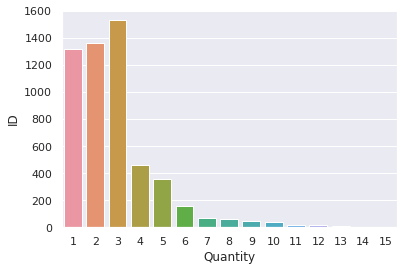

In [336]:
dff = bought_with_promo.loc[bought_with_promo['Promotion_1'] == 1].groupby(['Quantity']).count().reset_index()
sns.barplot(data=dff, x='Quantity',y='ID')

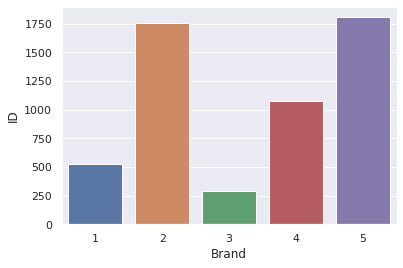

In [337]:
dff = bought_with_promo.loc[bought_with_promo['Promotion_1'] == 1].groupby(['Brand']).count().reset_index()
sns.barplot(data=dff, x='Brand',y='ID')

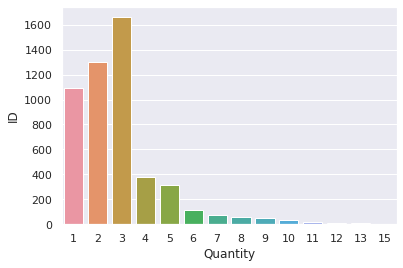

In [338]:
dff = bought_with_promo.loc[bought_with_promo['Promotion_2'] == 1].groupby(['Quantity']).count().reset_index()
sns.barplot(data=dff, x='Quantity',y='ID')

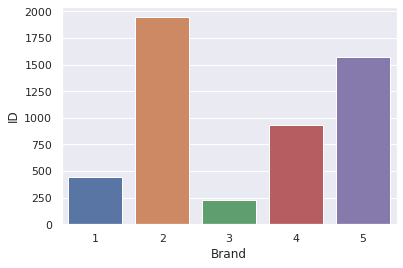

In [339]:
dff = bought_with_promo.loc[bought_with_promo['Promotion_2'] == 1].groupby(['Brand']).count().reset_index()
sns.barplot(data=dff, x='Brand',y='ID')

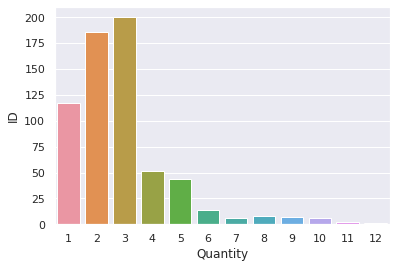

In [340]:
dff = bought_with_promo.loc[bought_with_promo['Promotion_3'] == 1].groupby(['Quantity']).count().reset_index()
sns.barplot(data=dff, x='Quantity',y='ID')

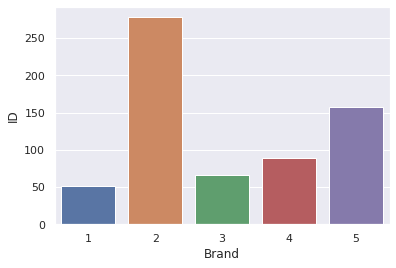

In [341]:
dff = bought_with_promo.loc[bought_with_promo['Promotion_3'] == 1].groupby(['Brand']).count().reset_index()
sns.barplot(data=dff, x='Brand',y='ID')

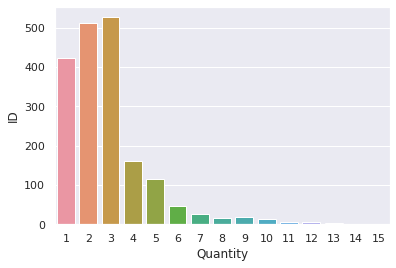

In [342]:
dff = bought_with_promo.loc[bought_with_promo['Promotion_4'] == 1].groupby(['Quantity']).count().reset_index()
sns.barplot(data=dff, x='Quantity',y='ID')

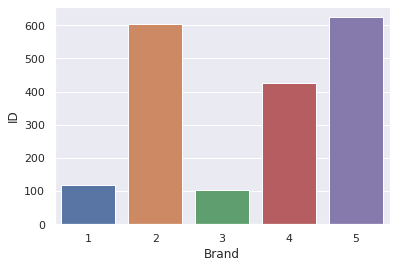

In [343]:
dff = bought_with_promo.loc[bought_with_promo['Promotion_4'] == 1].groupby(['Brand']).count().reset_index()
sns.barplot(data=dff, x='Brand',y='ID')

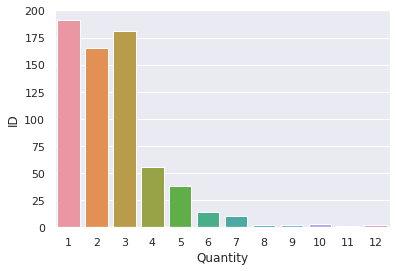

In [344]:
dff = bought_with_promo.loc[bought_with_promo['Promotion_5'] == 1].groupby(['Quantity']).count().reset_index()
sns.barplot(data=dff, x='Quantity',y='ID')

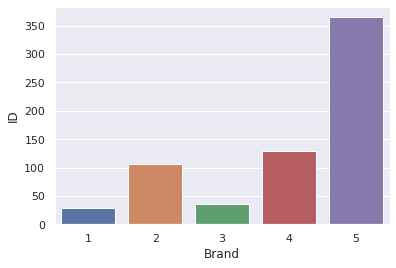

In [345]:
dff = bought_with_promo.loc[bought_with_promo['Promotion_5'] == 1].groupby(['Brand']).count().reset_index()
sns.barplot(data=dff, x='Brand',y='ID')

In [346]:
seg_inc.sort_values('Day')

,ID,Segment,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5
26349,200000229,2,1,1,5,2,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0
33437,200000289,3,1,1,5,1,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0
43398,200000374,0,1,1,4,6,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0
22837,200000198,1,1,1,2,1,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0
5826,200000052,2,1,1,2,1,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22393,200000193,1,727,1,2,2,0,0,1.50,1.82,2.09,2.24,2.80,0,0,0,0,0
27942,200000242,1,727,1,2,3,2,1,1.50,1.82,2.09,2.24,2.80,0,0,0,0,0
5370,200000047,3,727,1,2,2,2,1,1.50,1.82,2.09,2.24,2.80,0,0,0,0,0
45509,200000391,0,727,1,3,3,3,1,1.50,1.82,2.09,2.24,2.80,0,0,0,0,0


In [347]:
seg0 = seg_inc.loc[seg_inc['Segment'] == 0]
seg0

,ID,Segment,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5
101,200000002,0,6,1,4,1,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0
115,200000002,0,100,1,4,2,0,0,1.47,1.90,1.95,2.12,2.67,0,0,0,1,0
138,200000002,0,283,1,4,3,0,0,1.37,1.89,2.00,2.14,2.64,0,0,0,0,0
141,200000002,0,307,1,4,1,0,0,1.34,1.89,2.01,2.03,2.68,1,0,0,1,0
153,200000002,0,422,1,4,1,0,0,1.34,1.89,2.02,2.21,2.65,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,0,687,1,4,1,4,1,1.50,1.87,2.06,2.24,2.78,0,0,0,0,0
57347,200000489,0,693,1,4,2,4,1,1.42,1.51,2.02,2.24,2.77,0,1,0,0,0
57348,200000489,0,701,1,4,3,4,1,1.42,1.85,1.99,2.24,2.76,0,0,1,0,0
57350,200000489,0,715,1,4,2,0,0,1.50,1.80,2.09,2.24,2.79,0,0,0,0,0


In [348]:
seg_brand_counts = pd.DataFrame(df_purchase_incidence.groupby(['Segment','Brand'])['ID'].count()).rename(columns={'ID':'Count'})
seg_brand_counts

Count
Segment Brand       
0       1        142
        2        269
        3         88
        4       2189
        5        703
1       1        508
        2       2942
        3        117
        4        264
        5        454
2       1        527
        2        924
        3        521
        4        127
        5        482
3       1        173
        2        407
        3        115
        4        347
        5       3339

In [349]:
# seg_brand_counts.pivot(columns="Brand", values="Quantity")

# **Modeling**

# Purchase Incidence Modeling

## Data Preparation

In [350]:
#load data
path = '/content/drive/MyDrive/Portfolio/projects/Customer Analytics/'
df_purchase = pd.read_csv(path + 'data/purchase data.csv')

# Import Scaler
scaler = pickle.load(open(path + 'models/scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open(path + 'models/pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open(path + 'models/kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()
# Add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
# segment_dummies.drop(columns='Segment',axis=1,inplace=True)
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

In [351]:
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0


In [352]:
df_cust = df_pa[['ID','Segment']]
df_cust_list = df_cust.drop_duplicates()

In [353]:
df_cust_list['Segment'].value_counts()

1    188
3    110
2    104
0     98
Name: Segment, dtype: int64

## Purchase Probability Model

In [354]:
# In order to predict we need input and output variables. 
# Our Y is Incidence, as we want to predict the purchase probability for our customers
Y = df_pa['Incidence']

In [355]:
df_pa.loc[df_pa['Brand'] == 0, 'Purchase Price'] = 0

In [356]:
df_pa.loc[df_pa['Brand'] == 1, 'Purchase Price'] = df_pa['Price_1']
df_pa.loc[df_pa['Brand'] == 2, 'Purchase Price'] = df_pa['Price_2']
df_pa.loc[df_pa['Brand'] == 3, 'Purchase Price'] = df_pa['Price_3']
df_pa.loc[df_pa['Brand'] == 4, 'Purchase Price'] = df_pa['Price_4']
df_pa.loc[df_pa['Brand'] == 5, 'Purchase Price'] = df_pa['Price_5']

In [357]:
df_pa['Purchase Total'] = df_pa['Quantity'] * df_pa['Purchase Price']

In [358]:
df_pa = df_pa[['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Purchase Price', 'Purchase Total',
               'Last_Inc_Brand', 'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size', 'Segment', 'Segment_0', 'Segment_1',
       'Segment_2', 'Segment_3']]

In [359]:
# Our dependant variable is based on the average price of chocolate candy bars. 
# Therefore, X is a data frame, containing the mean across the five prices.
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5
Y = df_pa['Incidence']


In [360]:
# We create a Logistic Regression model using sk learn. Then we fit the model with our X or price and our Y or incidence.
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [361]:
# The coefficients for price. It is negative, signaling that with an increase in price, the purchase probability decreases.
model_purchase.coef_

array([[-2.34789085]])

## Price Elasticity of Purchase Probability

In [362]:
# Here we see the prices for the five different brands, which is an important factor in determining purchase probability. 
# It informs the price range, for which we will be exploring purchase probability.
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [363]:
# We introduce the price range for which we'll examine the purchase probability.
# We choose a price range between 0.5 and 3.49, which somewhat expands the actual observed price range, 
# which is from 1.1 to 2.8. 
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [364]:
df_price_range = pd.DataFrame(price_range)

In [365]:
# We predict the purchase probability for our newly defined price range. 
# The result is a 2x300  array. The first column shows the probability for not purchasing the product, 
# the second the probability for purchase for each price point in our price range.
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [366]:
Y_pr

array([[0.08210227, 0.91789773],
       [0.08388912, 0.91611088],
       [0.08571124, 0.91428876],
       [0.08756914, 0.91243086],
       [0.08946338, 0.91053662],
       [0.09139449, 0.90860551],
       [0.09336301, 0.90663699],
       [0.09536948, 0.90463052],
       [0.09741444, 0.90258556],
       [0.09949842, 0.90050158],
       [0.10162196, 0.89837804],
       [0.10378561, 0.89621439],
       [0.10598988, 0.89401012],
       [0.10823532, 0.89176468],
       [0.11052245, 0.88947755],
       [0.11285179, 0.88714821],
       [0.11522386, 0.88477614],
       [0.11763918, 0.88236082],
       [0.12009826, 0.87990174],
       [0.1226016 , 0.8773984 ],
       [0.1251497 , 0.8748503 ],
       [0.12774305, 0.87225695],
       [0.13038212, 0.86961788],
       [0.1330674 , 0.8669326 ],
       [0.13579935, 0.86420065],
       [0.13857842, 0.86142158],
       [0.14140506, 0.85859494],
       [0.1442797 , 0.8557203 ],
       [0.14720275, 0.85279725],
       [0.15017464, 0.84982536],
       [0.

In [367]:
# Create price elasticities master data frame.
# It will contain all the elasticities we calculate during the purchase analytics part of the course.
df_price_elasticities = pd.DataFrame(price_range)

In [368]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096384
1,0.51,-0.100451
2,0.52,-0.104645
3,0.53,-0.108969
4,0.54,-0.113427
5,0.55,-0.118021
6,0.56,-0.122755
7,0.57,-0.127633
8,0.58,-0.132657
9,0.59,-0.137831


In [369]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096384
1,0.51,-0.100451
2,0.52,-0.104645
3,0.53,-0.108969
4,0.54,-0.113427
5,0.55,-0.118021
6,0.56,-0.122755
7,0.57,-0.127633
8,0.58,-0.132657
9,0.59,-0.137831


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

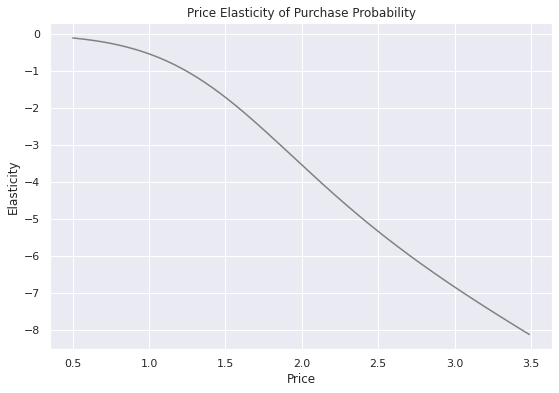

In [370]:
# We display the price elasticity of purchase probability of the average customer.
# We observe that the price elasticities are all negative. Furthermore we can spot where the customer becomes inelastic.
# But to find the precise spot we can consult the price elasticities data frame.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability by Segments

In [371]:
seg_map = dict({0:'Well-Off',
                                                                           1:'Fewer-Opportunities',
                                                                           2:'Standard',
                                                                           3:'Career-Focused'})

### $\color{blue}{\text{Segment 0 - Well-Off}}$

In [372]:
# Select only customers from segment 0, the standard segment.
df_pa_segment_0 = df_pa[df_pa['Segment_0'] == 1]
# Prepare dependant and independant variables.
Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5
# Logistic regression model
model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [373]:
model_incidence_segment0.coef_


array([[-1.24560762]])

In [374]:
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

### $\color{green}{\text{Segment 1 - Fewer-Opportunities}}$

In [375]:
df_pa.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Purchase Price', 'Purchase Total', 'Last_Inc_Brand', 'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size', 'Segment', 'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype='object')

In [376]:
# We filter the data to contain only customers from segment 1, the career-focused.
df_pa_segment_1 = df_pa[df_pa['Segment_1'] == 1]

In [377]:
# Again we want to predict the purchase probability, so our Y variable is the incidence column.
# Only here we select only the customers from the first segment.
Y = df_pa_segment_1['Incidence']

In [378]:
X = pd.DataFrame()

In [379]:
# We calculate the average price for purchases in segment 1. Our dependant variable contains the mean price of the brands.
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [380]:
# Fit logistic regression model
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [381]:
# We observe that the price coefficient for the career focused is -1.7, whereas for the average customer it was -2.35.
# This is an indicator, that this segment is less price sensitive compared to the average customer.
model_incidence_segment_1.coef_

array([[-3.63700406]])

In [382]:
# Calculate Price Elasticity of the career-focused segment.
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

### Results

In [383]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

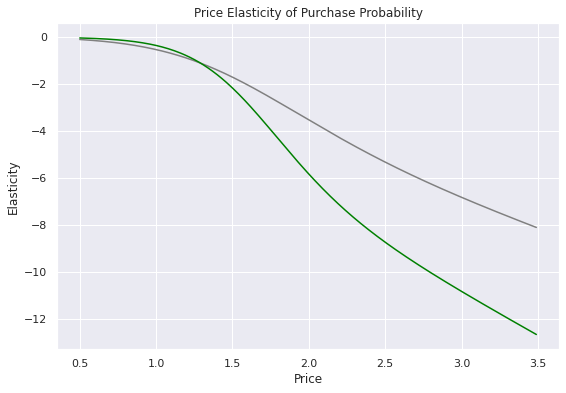

In [384]:
# We plot the elasticities of the average customer and the career-focused segment side by side. 
# The career-focused segment is displayed in green. The same color we used during the descriptive analysis.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{red}{\text{Segment 2 - Standard}}$

In [385]:
# Select only customers from segment 2, the fewer-opportunities.
df_pa_segment_2 = df_pa[df_pa['Segment_2'] == 1]

In [386]:
# Logistic regression model
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

# Calculate price elasticities
model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

### Results

In [387]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

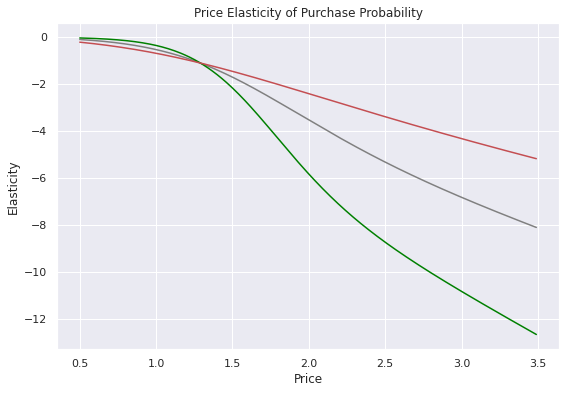

In [388]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{orange}{\text{Segment 3 - Career-Focused}}$

In [389]:
seg_map

{0: 'Well-Off', 1: 'Fewer-Opportunities', 2: 'Standard', 3: 'Career-Focused'}

In [390]:
# Select only customers from segment 3 
df_pa_segment_3 = df_pa[df_pa['Segment_3'] == 1]
# Prepare dependant and independant variables.
Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5
# Logistic regression model
model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096384,-0.167858,-0.030978,-0.210025,-0.119026
1,0.51,-0.100451,-0.172777,-0.032747,-0.216601,-0.123207
2,0.52,-0.104645,-0.177767,-0.034603,-0.223287,-0.127482
3,0.53,-0.108969,-0.182828,-0.036550,-0.230083,-0.131852
4,0.54,-0.113427,-0.187959,-0.038592,-0.236990,-0.136318
5,0.55,-0.118021,-0.193163,-0.040733,-0.244010,-0.140882
6,0.56,-0.122755,-0.198439,-0.042977,-0.251142,-0.145545
7,0.57,-0.127633,-0.203788,-0.045330,-0.258388,-0.150309
8,0.58,-0.132657,-0.209209,-0.047795,-0.265748,-0.155175
9,0.59,-0.137831,-0.214704,-0.050377,-0.273223,-0.160145


### ${\textbf{Results}}$

In [391]:
seg_map

{0: 'Well-Off', 1: 'Fewer-Opportunities', 2: 'Standard', 3: 'Career-Focused'}

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

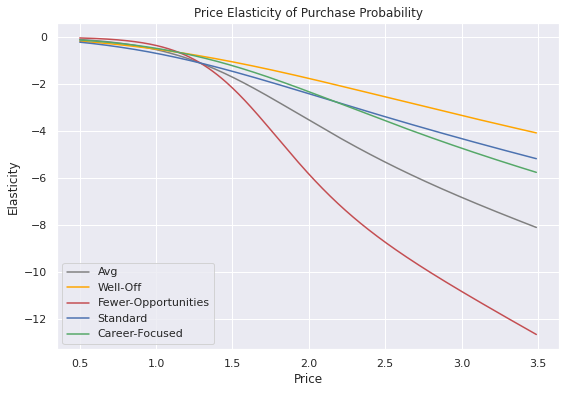

In [392]:
# We display all elasticities of purchase probability on the same plot. 
# We observe that the Career-focused segment are the least elastic when compared to the rest. 
# So, their purchase probability elasticity is not as affected by price.
# The price elasticities for the Standard segment seem to differ across price range. This may be due to the fact that
# the standard segment is least homogenous, which we discovered during our descriptive analysis. 
# It may be that the customers in this segment have different shopping habbits, which is why their 
# customers start with being more elastic than average but then shift to being more inelastic than the average customer
# and indeed the Career-focused segment.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey', label='Avg')
plt.plot(price_range, pe_segment0, color = 'orange', label='Well-Off')
plt.plot(price_range, pe_segment_1, color = 'r', label= 'Fewer-Opportunities')
plt.plot(price_range, pe_segment2, color = 'b', label= 'Standard')
plt.plot(price_range, pe_segment3, color = 'g', label='Career-Focused')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend(loc='best')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability with Promotion Feature

### Data Preparation

In [393]:
Y = df_pa['Incidence']

In [394]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [395]:
# We include a second promotion feature. We'd like to examine the effects of promotions on purchase probability.
# We calculate the average promotion rate across the five brands. We add the mean price for the brands.
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


## Model Estimation

In [396]:
# The coefficient for promotion is positive. 
# Therefore, there is a positive relationship between promotion and purchase probability.
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49403541,  0.56146751]])

## Price Elasticity with Promotion

In [397]:
# We create a data frame on which our model will predict. We need to include A price and promotion feature.
# First, we'll include the price range as the price feature. Next, we'll include the promotion feature.
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [398]:
# We'll calculate price elasticities of purchase probability when we assume there is a promotion across at each price points.
df_price_elasticity_promotion['Promotion'] = 1

In [399]:
# Purchase Probability with Promotion Model Prediction
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [400]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [401]:
# Update master data to include elasticities of purchase probability with promotion feature
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096384,-0.167858,-0.030978,-0.210025,-0.119026,-0.125748
1,0.51,-0.100451,-0.172777,-0.032747,-0.216601,-0.123207,-0.129864
2,0.52,-0.104645,-0.177767,-0.034603,-0.223287,-0.127482,-0.134060
3,0.53,-0.108969,-0.182828,-0.036550,-0.230083,-0.131852,-0.138335
4,0.54,-0.113427,-0.187959,-0.038592,-0.236990,-0.136318,-0.142692
5,0.55,-0.118021,-0.193163,-0.040733,-0.244010,-0.140882,-0.147130
6,0.56,-0.122755,-0.198439,-0.042977,-0.251142,-0.145545,-0.151652
7,0.57,-0.127633,-0.203788,-0.045330,-0.258388,-0.150309,-0.156257
8,0.58,-0.132657,-0.209209,-0.047795,-0.265748,-0.155175,-0.160947
9,0.59,-0.137831,-0.214704,-0.050377,-0.273223,-0.160145,-0.165723


## Price Elasticity without Promotion

In [402]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [403]:
# Promotion feature -No Promotion.
# We assume there aren't any promotional activities on any of the price points.
# We examine the elasticity of purchase probability when there isn't promotion.
df_price_elasticity_promotion_no['Promotion'] = 0

In [404]:
#Purchase Probability without Promotion Model Prediction
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [405]:
no_promo = Y_no_promo[: , 1]

In [406]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [407]:
# Update master data frame to include purchase probability elasticities without promotion.
# We can now see the values with and without promotion and compare them for each price point in our price range.
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

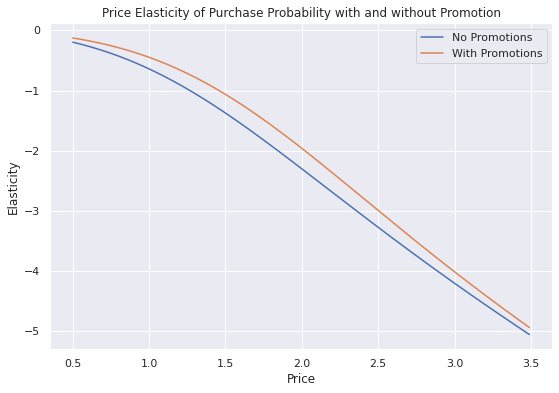

In [408]:
# Plot purchase elasticities with and without promotion side by side for comprarisson.
# Here we observe that the purchase probability elasticity of the customer is less elastic when there is promotion.
# This is an important insight for marketers, as according to our model people are more likely to buy a product if there is
# some promotional activity rather than purchase a product with the same price, when it isn't on promotion. 
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo, label='No Promotions')
plt.plot(price_range, price_elasticity_promo, label='With Promotions')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend(loc='best')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

# Brand Choice Modeling

### Data Preparation

In [409]:
# Here we are interested in determining the brand choice of the customer. 
# Hence, we filter our data, to include only purchase occasion, when a purchase has occured. 
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [410]:
# We cap the maximum displayed rows in a table, to make computation more efficient and easier readability.
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Purchase Price,Purchase Total,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,1.90,3.80,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
11,200000001,58,1,5,1,2.62,2.62,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,1,0,1,0,0
19,200000001,110,1,1,2,1.47,2.94,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,1,0,1,0,0
24,200000001,142,1,4,1,2.16,2.16,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
29,200000001,183,1,2,3,1.88,5.64,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,1.89,11.34,0,0,1.48,1.89,2.01,2.18,2.69,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58648,200000500,460,1,1,12,1.35,16.20,0,0,1.35,1.57,2.02,2.21,2.70,1,1,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58674,200000500,641,1,2,7,1.85,12.95,0,0,1.50,1.85,2.06,2.24,2.79,1,1,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0
58687,200000500,697,1,2,6,1.51,9.06,0,0,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,42,1,120946,1,0,1,0,1,0,0


In [411]:
# Our model will predict the brand.
Y = brand_choice['Brand']

In [412]:
# Here we decide which features to include for prediction.
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Purchase Price',
       'Purchase Total', 'Last_Inc_Brand', 'Last_Inc_Quantity', 'Price_1',
       'Price_2', 'Price_3', 'Price_4', 'Price_5', 'Promotion_1',
       'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5', 'Sex',
       'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size', 'Segment', 'Segment_0', 'Segment_1',
       'Segment_2', 'Segment_3'], dtype=object)

In [413]:
# We predict based on the prices for the five brands.
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [414]:
# Brand Choice Model fit.
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [415]:
# Here are the coeffictients for the model. We have five brands and five features for the price. 
# Therefore, this output is somewhat difficult to read.
model_brand_choice.coef_

array([[-3.91593717,  0.65847284,  2.41781143,  0.70409936, -0.20207975],
       [ 1.27461839, -1.87985177, -0.21262444, -0.20633617,  0.58787689],
       [ 1.62414913,  0.56208313,  0.50072798,  1.03947885,  0.45273766],
       [ 0.57454392,  0.39559291, -1.40058422, -1.24623897,  0.24935834],
       [ 0.44262573,  0.26370289, -1.30533076, -0.29100306, -1.08789313]])

In [416]:
# We create a pandas data frame, which contains to coefficients.
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915937,0.658473,2.417811,0.704099,-0.202080
1,1.274618,-1.879852,-0.212624,-0.206336,0.587877
2,1.624149,0.562083,0.500728,1.039479,0.452738
3,0.574544,0.395593,-1.400584,-1.246239,0.249358
4,0.442626,0.263703,-1.305331,-0.291003,-1.087893


In [417]:
# We make some transformations on the coefficients data frame to increase readability.
# We transpose the data frame, to keep with the conventional representation of results.
# We add labels for the columns and the index, which represent the coefficients of the brands and prices, respectively. 
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


## Own Price Elasticity Brand 2

In [418]:
# We want to calculate price elasticity of brand choice.
# Here we create a data frame with price columns, which our model will use to predict the brand choice probabilities.
df_own_brand_2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_2['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_2['Price_2'] = price_range
df_own_brand_2['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_2['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_2['Price_5'] = brand_choice['Price_5'].mean()
df_own_brand_2

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,0.50,2.006694,2.159658,2.654296
1,1.384559,0.51,2.006694,2.159658,2.654296
2,1.384559,0.52,2.006694,2.159658,2.654296
3,1.384559,0.53,2.006694,2.159658,2.654296
4,1.384559,0.54,2.006694,2.159658,2.654296
...,...,...,...,...,...
295,1.384559,3.45,2.006694,2.159658,2.654296
296,1.384559,3.46,2.006694,2.159658,2.654296
297,1.384559,3.47,2.006694,2.159658,2.654296
298,1.384559,3.48,2.006694,2.159658,2.654296


In [419]:
# Brand Choice Model prediction.
predict_brand_2 = model_brand_choice.predict_proba(df_own_brand_2)

In [420]:
# Our model returns the probabilities of choosing each of the 5 brands. 
# Since, we are interested in the probability for the fifth brand we need to obtain the last column located on position 4,
# as we're starting to count from 0.
pr_own_brand_2 = predict_brand_2[: ][:, 1]

In [421]:
# We're interested in choosing brand 5. 
# Therefore, the beta coefficient we require is that of the brand 5 coefficient and price 5.
beta2 = bc_coef.iloc[1, 1]
beta2

-1.88

In [422]:
# Calculating price elasticities for brand choice without promotion. 
own_price_elasticity_brand_2 = beta2 * price_range * (1 - pr_own_brand_2)

In [423]:
# Adding the price elasticities to our master data frame. 
df_price_elasticities['Brand_2'] = own_price_elasticity_brand_2
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2
0,0.50,-0.096384,-0.167858,-0.030978,-0.210025,-0.119026,-0.125748,-0.195658,-0.109608
1,0.51,-0.100451,-0.172777,-0.032747,-0.216601,-0.123207,-0.129864,-0.201780,-0.114025
2,0.52,-0.104645,-0.177767,-0.034603,-0.223287,-0.127482,-0.134060,-0.208004,-0.118568
3,0.53,-0.108969,-0.182828,-0.036550,-0.230083,-0.131852,-0.138335,-0.214331,-0.123241
4,0.54,-0.113427,-0.187959,-0.038592,-0.236990,-0.136318,-0.142692,-0.220763,-0.128045
5,0.55,-0.118021,-0.193163,-0.040733,-0.244010,-0.140882,-0.147130,-0.227299,-0.132983
6,0.56,-0.122755,-0.198439,-0.042977,-0.251142,-0.145545,-0.151652,-0.233942,-0.138059
7,0.57,-0.127633,-0.203788,-0.045330,-0.258388,-0.150309,-0.156257,-0.240691,-0.143275
8,0.58,-0.132657,-0.209209,-0.047795,-0.265748,-0.155175,-0.160947,-0.247547,-0.148634
9,0.59,-0.137831,-0.214704,-0.050377,-0.273223,-0.160145,-0.165723,-0.254511,-0.154138


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 2')

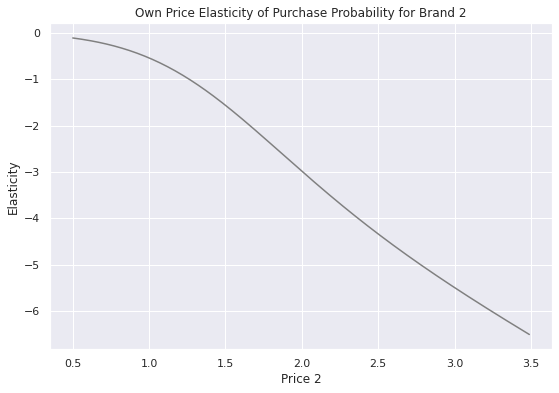

In [424]:
# Plot elasticities of purchase probability for brand 5.
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_2, color = 'grey')
plt.xlabel('Price 2')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 2')

## Cross Price Elasticity Brand 2, Cross Brand 1

In [425]:
# We want to examine the effect of the changes in price of a competitor brand.
# As we've discussed in the lecture, the brand which comes closest to our own brand is brand 4. 
# Therefore, we need to examine changes in the price of this brand.
# Keep in mind, we could examine the cross price elasticities for any of the remaining brands, 
# we just need to update this data frame accordingly to contain the respective brand.
df_brand2_cross_brand1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand2_cross_brand1['Price_1'] = price_range
df_brand2_cross_brand1['Price_2'] = brand_choice['Price_2'].mean()
df_brand2_cross_brand1['Price_3'] = brand_choice['Price_3'].mean()
df_brand2_cross_brand1['Price_4'] = brand_choice['Price_4'].mean()
df_brand2_cross_brand1['Price_5'] = brand_choice['Price_5'].mean()

In [426]:
df_brand2_cross_brand1.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,0.50,1.764717,2.006694,2.159658,2.654296
1,0.51,1.764717,2.006694,2.159658,2.654296
2,0.52,1.764717,2.006694,2.159658,2.654296
3,0.53,1.764717,2.006694,2.159658,2.654296
4,0.54,1.764717,2.006694,2.159658,2.654296


In [427]:
predict_brand2_cross_brand1 = model_brand_choice.predict_proba(df_brand2_cross_brand1)

In [428]:
# As now we're interested in what the probability of choosing the competitor brand is, 
# we need to select the purchase probability for brand 4, contained in the 4th column with index 3. 
pr_brand_1 = predict_brand2_cross_brand1[:][:, 0]

In [429]:
beta2

-1.88

In [430]:
# In order to calculate the cross brand price elasticity, we need to use the new formula we introduced in the lecture.
# The elasticity is equal to negative the price coefficient of the own brand multiplied by the price of the cross brand,
# further multiplied by the probability for choosing the cross brand.
brand2_cross_brand1_price_elasticity = -beta2 * price_range * pr_brand_1

In [431]:
# Update price elasticities data frame to include the cross price elasticities for brand 5 with respect to brand 4.
df_price_elasticities['Brand_2_Cross_Brand_1'] = brand2_cross_brand1_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2,Brand_2_Cross_Brand_1
0,0.50,-0.096384,-0.167858,-0.030978,-0.210025,-0.119026,-0.125748,-0.195658,-0.109608,0.800749
1,0.51,-0.100451,-0.172777,-0.032747,-0.216601,-0.123207,-0.129864,-0.201780,-0.114025,0.811103
2,0.52,-0.104645,-0.177767,-0.034603,-0.223287,-0.127482,-0.134060,-0.208004,-0.118568,0.821046
3,0.53,-0.108969,-0.182828,-0.036550,-0.230083,-0.131852,-0.138335,-0.214331,-0.123241,0.830566
4,0.54,-0.113427,-0.187959,-0.038592,-0.236990,-0.136318,-0.142692,-0.220763,-0.128045,0.839647
5,0.55,-0.118021,-0.193163,-0.040733,-0.244010,-0.140882,-0.147130,-0.227299,-0.132983,0.848276
6,0.56,-0.122755,-0.198439,-0.042977,-0.251142,-0.145545,-0.151652,-0.233942,-0.138059,0.856441
7,0.57,-0.127633,-0.203788,-0.045330,-0.258388,-0.150309,-0.156257,-0.240691,-0.143275,0.864128
8,0.58,-0.132657,-0.209209,-0.047795,-0.265748,-0.155175,-0.160947,-0.247547,-0.148634,0.871323
9,0.59,-0.137831,-0.214704,-0.050377,-0.273223,-0.160145,-0.165723,-0.254511,-0.154138,0.878015


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 2 wrt Brand 1')

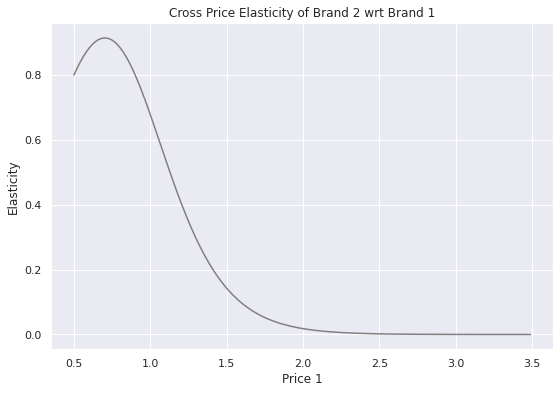

In [432]:
# Here we examine the cross price elasticity of purchase probability for brand 5 with respect to brand 4.
# We observe they are positive. As the price of the competitor brand increases, 
# so does the probability for purchasing our own brand.
# Even though the elasticity starts to decrease from the 1.45 mark, it is still positive, 
# signalling that the increase in purchase probability for the own brand happens more slowly.
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand2_cross_brand1_price_elasticity, color = 'grey')
plt.xlabel('Price 1')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 2 wrt Brand 1')

## Own and Cross-Price Elasticity by Segment

In [433]:
seg_map

{0: 'Well-Off', 1: 'Fewer-Opportunities', 2: 'Standard', 3: 'Career-Focused'}

### $\color{orange}{\text{Well-Off}}$

In [434]:
# We are interested in analysing the purchase probability for choosing brand 5 by segments.
# We filter our data to contain only purchase incidences of the third segment - Well-off.
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment_0'] == 1]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Purchase Price,Purchase Total,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,2.09,2.09,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,1,1,52,2,159052,2,1,0,1,0,0,0
115,200000002,100,1,4,2,2.12,4.24,0,0,1.47,1.90,1.95,2.12,2.67,0,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0
138,200000002,283,1,4,3,2.14,6.42,0,0,1.37,1.89,2.00,2.14,2.64,0,0,0,0,0,1,1,52,2,159052,2,1,0,1,0,0,0
141,200000002,307,1,4,1,2.03,2.03,0,0,1.34,1.89,2.01,2.03,2.68,1,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0
153,200000002,422,1,4,1,2.21,2.21,0,0,1.34,1.89,2.02,2.21,2.65,0,0,0,1,0,1,1,52,2,159052,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,2.24,2.24,4,1,1.50,1.87,2.06,2.24,2.78,0,0,0,0,0,1,1,44,2,193816,2,1,0,1,0,0,0
57347,200000489,693,1,4,2,2.24,4.48,4,1,1.42,1.51,2.02,2.24,2.77,0,1,0,0,0,1,1,44,2,193816,2,1,0,1,0,0,0
57348,200000489,701,1,4,3,2.24,6.72,4,1,1.42,1.85,1.99,2.24,2.76,0,0,1,0,0,1,1,44,2,193816,2,1,0,1,0,0,0
57350,200000489,715,1,4,2,2.24,4.48,0,0,1.50,1.80,2.09,2.24,2.79,0,0,0,0,0,1,1,44,2,193816,2,1,0,1,0,0,0


In [435]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


### $\color{orange}{\text{Own-Brand Price Elasticity}}$

In [436]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_2_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_2_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_2_s3['Price_2'] = price_range
df_own_brand_2_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_2_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_2_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_own_brand_2_s3 = model_brand_choice_s3.predict_proba(df_own_brand_2_s3)
pr_own_brand_2_s3 = predict_own_brand_2_s3[: ][: , 1]

own_price_elasticity_brand_2_s3 =  beta2 * price_range * (1 - pr_own_brand_2_s3)
df_price_elasticities['Brand 2 S0'] = own_price_elasticity_brand_2_s3

### $\color{orange}{\text{Cross-Brand Price Elasticity}}$

In [437]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand2_cross_brand1_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand2_cross_brand1_s3['Price_1'] = price_range
df_brand2_cross_brand1_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand2_cross_brand1_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand2_cross_brand1_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_brand2_cross_brand1_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand2_cross_brand1_s3 = model_brand_choice_s3.predict_proba(df_brand2_cross_brand1_s3)
pr_cross_brand_2_s3 = predict_brand2_cross_brand1_s3[: ][: , 0]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand2_cross_brand1_price_elasticity_s3 = -beta2 * price_range * pr_cross_brand_2_s3
df_price_elasticities['Brand_2_Cross_Brand_1_S0'] = brand2_cross_brand1_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2,Brand_2_Cross_Brand_1,Brand 2 S0,Brand_2_Cross_Brand_1_S0
0,0.50,-0.096384,-0.167858,-0.030978,-0.210025,-0.119026,-0.125748,-0.195658,-0.109608,0.800749,-0.509088,0.212742
1,0.51,-0.100451,-0.172777,-0.032747,-0.216601,-0.123207,-0.129864,-0.201780,-0.114025,0.811103,-0.523080,0.213243
2,0.52,-0.104645,-0.177767,-0.034603,-0.223287,-0.127482,-0.134060,-0.208004,-0.118568,0.821046,-0.537228,0.213642
3,0.53,-0.108969,-0.182828,-0.036550,-0.230083,-0.131852,-0.138335,-0.214331,-0.123241,0.830566,-0.551532,0.213944
4,0.54,-0.113427,-0.187959,-0.038592,-0.236990,-0.136318,-0.142692,-0.220763,-0.128045,0.839647,-0.565990,0.214151
5,0.55,-0.118021,-0.193163,-0.040733,-0.244010,-0.140882,-0.147130,-0.227299,-0.132983,0.848276,-0.580603,0.214265
6,0.56,-0.122755,-0.198439,-0.042977,-0.251142,-0.145545,-0.151652,-0.233942,-0.138059,0.856441,-0.595370,0.214289
7,0.57,-0.127633,-0.203788,-0.045330,-0.258388,-0.150309,-0.156257,-0.240691,-0.143275,0.864128,-0.610291,0.214226
8,0.58,-0.132657,-0.209209,-0.047795,-0.265748,-0.155175,-0.160947,-0.247547,-0.148634,0.871323,-0.625365,0.214079
9,0.59,-0.137831,-0.214704,-0.050377,-0.273223,-0.160145,-0.165723,-0.254511,-0.154138,0.878015,-0.640592,0.213850


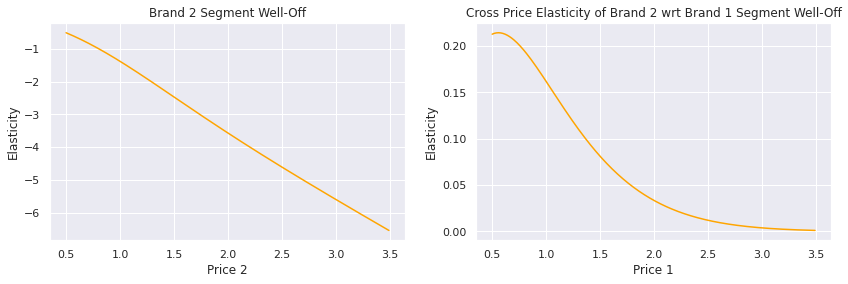

In [438]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_2_s3, color = 'orange')
axs[0].set_title('Brand 2 Segment Well-Off')
axs[0].set_xlabel('Price 2')

axs[1].plot(price_range, brand2_cross_brand1_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 2 wrt Brand 1 Segment Well-Off')
axs[1].set_xlabel('Price 1')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

### $\color{blue}{\text{Standard}}$

In [439]:
# Here we are interesting in analysing the brand choice probability of the Standard segment.
# We filter our data, by selecting only purchases from segment 0.
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment_2'] == 1]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Purchase Price,Purchase Total,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2398,200000024,44,1,2,2,1.58,3.16,0,0,1.35,1.58,1.97,2.09,2.67,1,1,1,0,0,1,1,32,1,88428,0,0,2,0,0,1,0
2403,200000024,98,1,2,2,1.90,3.80,0,0,1.47,1.90,1.95,2.12,2.67,0,0,0,0,0,1,1,32,1,88428,0,0,2,0,0,1,0
2408,200000024,143,1,2,3,1.35,4.05,0,0,1.21,1.35,1.99,2.16,2.67,1,1,0,0,0,1,1,32,1,88428,0,0,2,0,0,1,0
2410,200000024,162,1,2,5,1.90,9.50,0,0,1.39,1.90,1.94,2.16,2.49,1,0,0,0,0,1,1,32,1,88428,0,0,2,0,0,1,0
2417,200000024,217,1,5,1,2.67,2.67,0,0,1.34,1.89,1.99,2.13,2.67,0,0,0,0,0,1,1,32,1,88428,0,0,2,0,0,1,0


In [440]:
# Brand Choice Model estimation.
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{blue}{\text{Own-Brand Price Elasticity}}$

In [441]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_2_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_2_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_2_s0['Price_2'] = price_range
df_own_brand_2_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_2_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_2_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_own_brand_2_s0 = model_brand_choice_s0.predict_proba(df_own_brand_2_s0)
pr_own_brand_2_s0 = predict_own_brand_2_s0[: ][: , 1]

# Compute price elasticities and update master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_2_s0 =  beta2 * price_range * (1 - pr_own_brand_2_s0)
df_price_elasticities.insert(10, column = 'Brand 2 S2', value = own_price_elasticity_brand_2_s0)

### $\color{blue}{\text{Cross-Brand Price Elasticity}}$

In [442]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Standard segment.
df_brand2_cross_brand1_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand2_cross_brand1_s0['Price_1'] = price_range
df_brand2_cross_brand1_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand2_cross_brand1_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand2_cross_brand1_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_brand2_cross_brand1_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand2_cross_brand1_s0 = model_brand_choice_s0.predict_proba(df_brand2_cross_brand1_s0)
pr_cross_brand_2_s0 = predict_brand2_cross_brand1_s0[: ][: , 0]

# Compute price elasticities and update master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand2_cross_brand1_price_elasticity_s0 = -beta2 * price_range * pr_cross_brand_2_s0
df_price_elasticities.insert(11, column = 'Brand_2_Cross_Brand_1_S2', value = brand2_cross_brand1_price_elasticity_s0)

Text(0.5, 1.0, 'Cross Brand 1 Segment Standard')

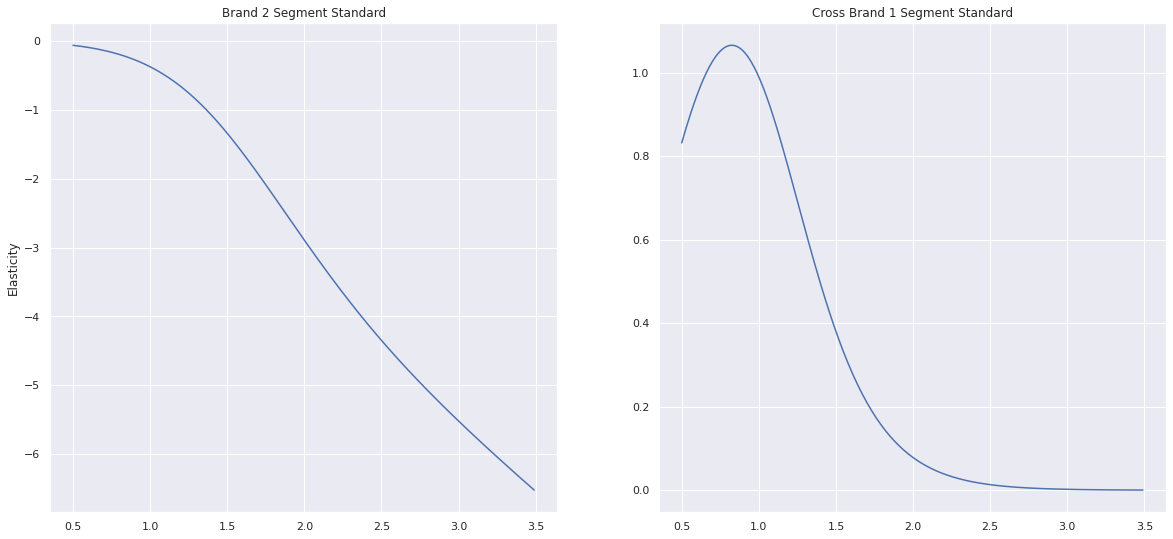

In [443]:
fig1, ax2 = plt.subplots(1, 2, figsize = (20, 9), sharex = True)


ax2[0].plot(price_range, own_price_elasticity_brand_2_s0)
ax2[0].set_title('Brand 2 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand2_cross_brand1_price_elasticity_s0)
ax2[1].set_title('Cross Brand 1 Segment Standard')

### $\color{green}{\text{Career-Focused}}$

In [444]:
# Filter data by the Career-focused segment, which is the first segment.
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment_3'] == 1]

In [445]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{green}{\text{Own-Brand Price Elasticity}}$

In [446]:
# Calculating own-brand price elasticity for brand 5 and the Career-focused segment.
df_own_brand_2_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_2_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_2_s1['Price_2'] = price_range
df_own_brand_2_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_2_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_2_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_own_brand_2_s1 = model_brand_choice_s1.predict_proba(df_own_brand_2_s1)
pr_own_brand_2_s1 = predict_own_brand_2_s1[: ][: , 1]

#compute price elasticities and update data frame
own_price_elasticity_brand_2_s1 =  beta2 * price_range * (1 - pr_own_brand_2_s1)
df_price_elasticities.insert(12, column = 'Brand 2 S3', value = own_price_elasticity_brand_2_s1)

### $\color{green}{\text{Cross-Brand Price Elasticity}}$

In [447]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand2_cross_brand1_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand2_cross_brand1_s1['Price_1'] = price_range
df_brand2_cross_brand1_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand2_cross_brand1_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand2_cross_brand1_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_brand2_cross_brand1_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand2_cross_brand1_s1 = model_brand_choice_s1.predict_proba(df_brand2_cross_brand1_s1)
pr_cross_brand_2_s1 = predict_brand2_cross_brand1_s1[: ][: , 0]

brand2_cross_brand1_price_elasticity_s1 = -beta2 * price_range * pr_cross_brand_2_s1
df_price_elasticities.insert(13, column = 'Brand_2_Cross_Brand_1_S3', value = brand2_cross_brand1_price_elasticity_s1)

### $\color{red}{\text{Fewer-Opportunities}}$

In [448]:
# Filter data, select only purchases from segment 2, which is the Fewer-Opportunities segment.
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment_1'] == 1]

In [449]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{red}{\text{Own-Brand Price Elasticity}}$

In [450]:
# Calculating own-brand price elasticity for brand 5 and the Fewer-opportunities segment.
df_own_brand_2_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_2_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_2_s2['Price_2'] = price_range
df_own_brand_2_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_2_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_2_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_own_brand_2_s2 = model_brand_choice_s2.predict_proba(df_own_brand_2_s2)
pr_own_brand_2_s2 = predict_own_brand_2_s2[: ][: , 1]

#compute price elasticities and update data frame
own_price_elasticity_brand_2_s2 =  beta2 * price_range * (1 - pr_own_brand_2_s2)
df_price_elasticities.insert(14, column = 'Brand 2 S1', value = own_price_elasticity_brand_2_s2)

### $\color{red}{\text{Cross-Brand Price Elasticity}}$

In [451]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Fewer-opportunities segment.
df_brand2_cross_brand1_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand2_cross_brand1_s2['Price_1'] = price_range
df_brand2_cross_brand1_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand2_cross_brand1_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand2_cross_brand1_s2['Price_4'] = brand_choice_s2['Price_1'].mean()
df_brand2_cross_brand1_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand2_cross_brand1_s2 = model_brand_choice_s2.predict_proba(df_brand2_cross_brand1_s2)
pr_cross_brand_2_s2 = predict_brand2_cross_brand1_s2[: ][: , 0]

brand2_cross_brand1_price_elasticity_s2 = -beta2 * price_range * pr_cross_brand_2_s2
df_price_elasticities.insert(15, column = 'Brand_2_Cross_Brand_1_S1', value = brand2_cross_brand1_price_elasticity_s2)
df_price_elasticities


,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2,Brand_2_Cross_Brand_1,Brand 2 S2,Brand_2_Cross_Brand_1_S2,Brand 2 S3,Brand_2_Cross_Brand_1_S3,Brand 2 S1,Brand_2_Cross_Brand_1_S1,Brand 2 S0,Brand_2_Cross_Brand_1_S0
0,0.50,-0.096384,-0.167858,-0.030978,-0.210025,-0.119026,-0.125748,-0.195658,-0.109608,0.800749,-0.059291,0.831706,-0.390075,0.233580,-0.012822,0.676931,-0.509088,0.212742
1,0.51,-0.100451,-0.172777,-0.032747,-0.216601,-0.123207,-0.129864,-0.201780,-0.114025,0.811103,-0.061959,0.844538,-0.402773,0.234096,-0.013422,0.680823,-0.523080,0.213243
2,0.52,-0.104645,-0.177767,-0.034603,-0.223287,-0.127482,-0.134060,-0.208004,-0.118568,0.821046,-0.064720,0.857105,-0.415681,0.234499,-0.014044,0.684123,-0.537228,0.213642
3,0.53,-0.108969,-0.182828,-0.036550,-0.230083,-0.131852,-0.138335,-0.214331,-0.123241,0.830566,-0.067577,0.869397,-0.428797,0.234791,-0.014690,0.686823,-0.551532,0.213944
4,0.54,-0.113427,-0.187959,-0.038592,-0.236990,-0.136318,-0.142692,-0.220763,-0.128045,0.839647,-0.070531,0.881406,-0.442122,0.234975,-0.015360,0.688918,-0.565990,0.214151
5,0.55,-0.118021,-0.193163,-0.040733,-0.244010,-0.140882,-0.147130,-0.227299,-0.132983,0.848276,-0.073587,0.893122,-0.455656,0.235055,-0.016056,0.690405,-0.580603,0.214265
6,0.56,-0.122755,-0.198439,-0.042977,-0.251142,-0.145545,-0.151652,-0.233942,-0.138059,0.856441,-0.076746,0.904536,-0.469398,0.235033,-0.016777,0.691280,-0.595370,0.214289
7,0.57,-0.127633,-0.203788,-0.045330,-0.258388,-0.150309,-0.156257,-0.240691,-0.143275,0.864128,-0.080012,0.915638,-0.483348,0.234912,-0.017525,0.691543,-0.610291,0.214226
8,0.58,-0.132657,-0.209209,-0.047795,-0.265748,-0.155175,-0.160947,-0.247547,-0.148634,0.871323,-0.083387,0.926419,-0.497506,0.234697,-0.018301,0.691193,-0.625365,0.214079
9,0.59,-0.137831,-0.214704,-0.050377,-0.273223,-0.160145,-0.165723,-0.254511,-0.154138,0.878015,-0.086875,0.936870,-0.511870,0.234388,-0.019105,0.690232,-0.640592,0.213850


In [457]:
S1_pe_check = df_price_elasticities[['Price_Point','Brand 2 S1','Brand_2_Cross_Brand_1_S1']]
S1_pe_check.loc[S1_pe_check['Price_Point'] >= 1.1]

,Price_Point,Brand 2 S1,Brand_2_Cross_Brand_1_S1
60,1.10,-0.132582,0.228578
61,1.11,-0.137220,0.220283
62,1.12,-0.142003,0.212212
63,1.13,-0.146937,0.204365
64,1.14,-0.152026,0.196742
65,1.15,-0.157273,0.189341
66,1.16,-0.162683,0.182160
67,1.17,-0.168260,0.175198
68,1.18,-0.174008,0.168451
69,1.19,-0.179933,0.161918


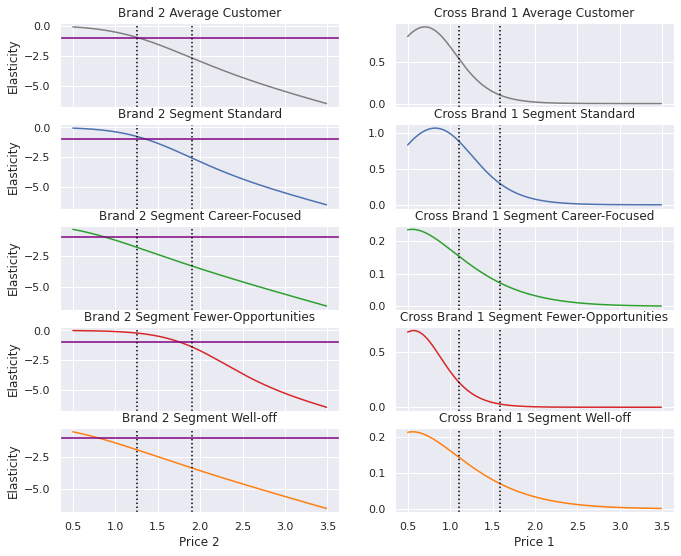

In [476]:
#  We plot the own and cross brand price elasticities for the average customer and each of the four segments.
# We can observe differences and similiraties between the segments and examine their preference, when it comes to brand choice.
# The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the Career-focused
# and the Well-off. They are also the segments which purchase this brand most often. 
# The Career-focused segment is the most inelastic and they are the most loyal segment. 
# Based on our model, they do not seem to be that affected by price, therefore brand 5 could increase its price, 
# without fear of significant loss of customers from this segment. 
# The Well-off segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
# In order to target this segment, our analysis signals, that price needs to be decreased. However, keep in mind 
# that other factors aside from price might be influencing the purchase behaivour of this segment.
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)

ax1[0].plot(price_range, own_price_elasticity_brand_2, 'tab:grey')
ax1[0].set_title('Brand 2 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand2_cross_brand1_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 1 Average Customer')

ax2[0].plot(price_range, own_price_elasticity_brand_2_s0)
ax2[0].set_title('Brand 2 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand2_cross_brand1_price_elasticity_s0)
ax2[1].set_title('Cross Brand 1 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_2_s1, 'tab:green')
ax3[0].set_title('Brand 2 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand2_cross_brand1_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 1 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_2_s2, 'tab:red')
ax4[0].set_title('Brand 2 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand2_cross_brand1_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 1 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_2_s3, 'tab:orange')
ax5[0].set_title('Brand 2 Segment Well-off')
ax5[0].set_xlabel('Price 2')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand2_cross_brand1_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 1 Segment Well-off')
ax5[1].set_xlabel('Price 1')

ax1[0].axhline(y=-1, color='purple')
ax2[0].axhline(y=-1, color='purple')
ax3[0].axhline(y=-1, color='purple')
ax4[0].axhline(y=-1, color='purple')
ax5[0].axhline(y=-1, color='purple')

ax1[0].axvline(x=1.26, color='black', linestyle=':')
ax2[0].axvline(x=1.26, color='black', linestyle=':')
ax3[0].axvline(x=1.26, color='black', linestyle=':')
ax4[0].axvline(x=1.26, color='black', linestyle=':')
ax5[0].axvline(x=1.26, color='black', linestyle=':')

ax1[0].axvline(x=1.90, color='black', linestyle=':')
ax2[0].axvline(x=1.90, color='black', linestyle=':')
ax3[0].axvline(x=1.90, color='black', linestyle=':')
ax4[0].axvline(x=1.90, color='black', linestyle=':')
ax5[0].axvline(x=1.90, color='black', linestyle=':')

ax1[1].axvline(x=1.10, color='black', linestyle=':')
ax2[1].axvline(x=1.10, color='black', linestyle=':')
ax3[1].axvline(x=1.10, color='black', linestyle=':')
ax4[1].axvline(x=1.10, color='black', linestyle=':')
ax5[1].axvline(x=1.10, color='black', linestyle=':')

ax1[1].axvline(x=1.59, color='black', linestyle=':')
ax2[1].axvline(x=1.59, color='black', linestyle=':')
ax3[1].axvline(x=1.59, color='black', linestyle=':')
ax4[1].axvline(x=1.59, color='black', linestyle=':')
ax5[1].axvline(x=1.59, color='black', linestyle=':')

# Purchase Quantity Modeling

## Price Elasticity of Purchase Quantity

In [575]:
# We want to determine price elasticity of purchase quantity, also known as price elasticity of demand.
# We are interested in purchase ocassion, where the purchased quantity is different from 0.
# Therefore, once again we filter our data to contain only shopping visits where the client has purchased at least one product.
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Purchase Price,Purchase Total,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,1.90,3.80,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
11,200000001,58,1,5,1,2.62,2.62,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,1,0,1,0,0
19,200000001,110,1,1,2,1.47,2.94,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,1,0,1,0,0
24,200000001,142,1,4,1,2.16,2.16,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,1,0,1,0,0
29,200000001,183,1,2,3,1.88,5.64,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,1,0,1,0,0


In [576]:
# Create brand dummies, for each of the five brands.
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
# The descriptive analysis of the purchase quantitiy data frame, shows that quantity ranges from 1 to 15 
# and has an average value of 2.8, which means that more often than not our customers buy more than 1 chocolate candy bar.
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Purchase Price,Purchase Total,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,2.099212,5.653544,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,2.654296,0.372455,0.349638,0.043858,0.128091,0.045430,0.357289,0.385162,40.346905,1.151045,126706.452043,0.845471,0.797513,1.543244,0.231657,0.292731,0.176322,0.299290,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,0.469609,3.851483,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,0.097724,0.483475,0.476872,0.204787,0.334203,0.208252,0.479217,0.486650,12.346284,0.634625,39935.109358,0.633840,0.810358,1.144602,0.421906,0.455032,0.381107,0.457962,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,1.100000,1.190000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,2.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,1.850000,2.770000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,2.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,102723.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,2.090000,4.890000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,2.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,1.000000,122895.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,2.620000,6.720000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,2.700000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,49.000000,2.000000,147967.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,2.800000,40.050000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,2.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [577]:
# Here we make a decission on which features to include in our model. We decide to include a Price and a Promotion feature.
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Purchase Price',
       'Purchase Total', 'Last_Inc_Brand', 'Last_Inc_Quantity', 'Price_1',
       'Price_2', 'Price_3', 'Price_4', 'Price_5', 'Promotion_1',
       'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5', 'Sex',
       'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size', 'Segment', 'Segment_0', 'Segment_1',
       'Segment_2', 'Segment_3', 'Brand_1', 'Brand_2', 'Brand_3',
       'Brand_4', 'Brand_5'], dtype=object)

In [578]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [579]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

## Model Estimation. Linear Regression

In [600]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]

pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [601]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [602]:
# Linear Regression Model
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [603]:
# Linear Regression Model. The coefficients for price and promotion are both negative. 
# It appears that promotion reflects negatively on the purchase quantity of the average client, which is unexpected.
model_quantity.coef_

array([-0.8173651 , -0.10504673])

## Price Elasticity with Promotion

In [604]:
# We examine the price elasticity of purchase quantity with active promotional activities for each price point.
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [605]:
#Take the coefficient for price.
beta_quantity = model_quantity.coef_[0]

beta_quantity

-0.8173651016684991

In [606]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [607]:
# We calculate the price elasticity with our new formula. It is the beta coefficient for price multiplied by price
# and divided by the purchase quantity.
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [608]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2,Brand_2_Cross_Brand_1,Brand 2 S2,Brand_2_Cross_Brand_1_S2,Brand 2 S3,Brand_2_Cross_Brand_1_S3,Brand 2 S1,Brand_2_Cross_Brand_1_S1,Brand 2 S0,Brand_2_Cross_Brand_1_S0,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096384,-0.167858,-0.030978,-0.210025,-0.119026,-0.125748,-0.195658,-0.109608,0.800749,-0.059291,0.831706,-0.390075,0.233580,-0.012822,0.676931,-0.509088,0.212742,-0.102157,-0.099543
1,0.51,-0.100451,-0.172777,-0.032747,-0.216601,-0.123207,-0.129864,-0.201780,-0.114025,0.811103,-0.061959,0.844538,-0.402773,0.234096,-0.013422,0.680823,-0.523080,0.213243,-0.104413,-0.101736
2,0.52,-0.104645,-0.177767,-0.034603,-0.223287,-0.127482,-0.134060,-0.208004,-0.118568,0.821046,-0.064720,0.857105,-0.415681,0.234499,-0.014044,0.684123,-0.537228,0.213642,-0.106679,-0.103939
3,0.53,-0.108969,-0.182828,-0.036550,-0.230083,-0.131852,-0.138335,-0.214331,-0.123241,0.830566,-0.067577,0.869397,-0.428797,0.234791,-0.014690,0.686823,-0.551532,0.213944,-0.108954,-0.106150
4,0.54,-0.113427,-0.187959,-0.038592,-0.236990,-0.136318,-0.142692,-0.220763,-0.128045,0.839647,-0.070531,0.881406,-0.442122,0.234975,-0.015360,0.688918,-0.565990,0.214151,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012291,-4.020961,-12.531830,-5.112504,-5.683003,-4.861699,-4.983286,-6.424124,0.000023,-6.443130,0.000381,-6.468110,0.000895,-6.377574,0.000003,-6.469639,0.001239,-1.774292,-1.664290
296,3.46,-8.037539,-4.035829,-12.568720,-5.129530,-5.703166,-4.879901,-5.000192,-6.444137,0.000022,-6.462920,0.000366,-6.487234,0.000870,-6.399250,0.000002,-6.488738,0.001207,-1.788634,-1.677205
297,3.47,-8.062754,-4.050681,-12.605594,-5.146536,-5.723292,-4.898072,-5.017078,-6.464127,0.000021,-6.482688,0.000353,-6.506353,0.000845,-6.420853,0.000002,-6.507832,0.001176,-1.803124,-1.690246
298,3.48,-8.087934,-4.065516,-12.642451,-5.163523,-5.743382,-4.916213,-5.033945,-6.484095,0.000020,-6.502434,0.000339,-6.525466,0.000821,-6.442385,0.000002,-6.526920,0.001146,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

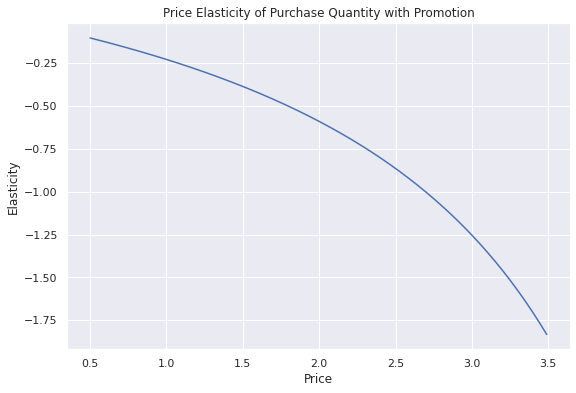

In [609]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

## Price Elasticity without Promotion

In [610]:
# Overwrite promotion incidence in order to use the same df. 
# Here we assume there are no promotinal activities active for the entire price range.
df_price_elasticity_quantity['Promotion_Incidence'] = 0
# Find the new predicted quantities.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# Calculate the new price elasticities.
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
# Add the results to the master data frame.
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_2,Brand_2_Cross_Brand_1,Brand 2 S2,Brand_2_Cross_Brand_1_S2,Brand 2 S3,Brand_2_Cross_Brand_1_S3,Brand 2 S1,Brand_2_Cross_Brand_1_S1,Brand 2 S0,Brand_2_Cross_Brand_1_S0,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096384,-0.167858,-0.030978,-0.210025,-0.119026,-0.125748,-0.195658,-0.109608,0.800749,-0.059291,0.831706,-0.390075,0.233580,-0.012822,0.676931,-0.509088,0.212742,-0.102157,-0.099543
1,0.51,-0.100451,-0.172777,-0.032747,-0.216601,-0.123207,-0.129864,-0.201780,-0.114025,0.811103,-0.061959,0.844538,-0.402773,0.234096,-0.013422,0.680823,-0.523080,0.213243,-0.104413,-0.101736
2,0.52,-0.104645,-0.177767,-0.034603,-0.223287,-0.127482,-0.134060,-0.208004,-0.118568,0.821046,-0.064720,0.857105,-0.415681,0.234499,-0.014044,0.684123,-0.537228,0.213642,-0.106679,-0.103939
3,0.53,-0.108969,-0.182828,-0.036550,-0.230083,-0.131852,-0.138335,-0.214331,-0.123241,0.830566,-0.067577,0.869397,-0.428797,0.234791,-0.014690,0.686823,-0.551532,0.213944,-0.108954,-0.106150
4,0.54,-0.113427,-0.187959,-0.038592,-0.236990,-0.136318,-0.142692,-0.220763,-0.128045,0.839647,-0.070531,0.881406,-0.442122,0.234975,-0.015360,0.688918,-0.565990,0.214151,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012291,-4.020961,-12.531830,-5.112504,-5.683003,-4.861699,-4.983286,-6.424124,0.000023,-6.443130,0.000381,-6.468110,0.000895,-6.377574,0.000003,-6.469639,0.001239,-1.774292,-1.664290
296,3.46,-8.037539,-4.035829,-12.568720,-5.129530,-5.703166,-4.879901,-5.000192,-6.444137,0.000022,-6.462920,0.000366,-6.487234,0.000870,-6.399250,0.000002,-6.488738,0.001207,-1.788634,-1.677205
297,3.47,-8.062754,-4.050681,-12.605594,-5.146536,-5.723292,-4.898072,-5.017078,-6.464127,0.000021,-6.482688,0.000353,-6.506353,0.000845,-6.420853,0.000002,-6.507832,0.001176,-1.803124,-1.690246
298,3.48,-8.087934,-4.065516,-12.642451,-5.163523,-5.743382,-4.916213,-5.033945,-6.484095,0.000020,-6.502434,0.000339,-6.525466,0.000821,-6.442385,0.000002,-6.526920,0.001146,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion vs Without')

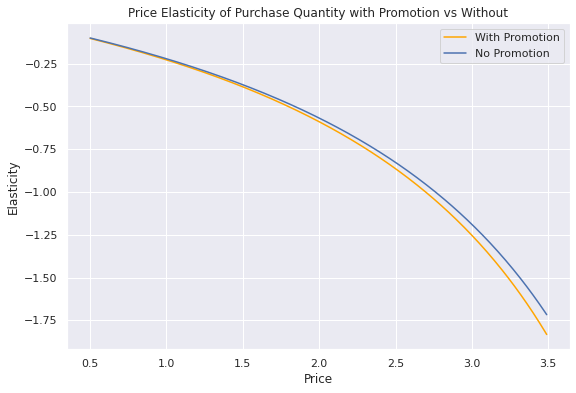

In [613]:
# Plot the two elasticities side by side. 
# We observe that the two elasticities are very close together for almost the entire price range.
# It appears that promotion does not appear to be a significant factor in the customers' decission 
# what quantity of chocolate candy bars to purchase.
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange', label='With Promotion')
plt.plot(price_range, price_elasticity_quantity_promotion_no, label='No Promotion')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.legend(loc='best')
plt.title('Price Elasticity of Purchase Quantity with Promotion vs Without')